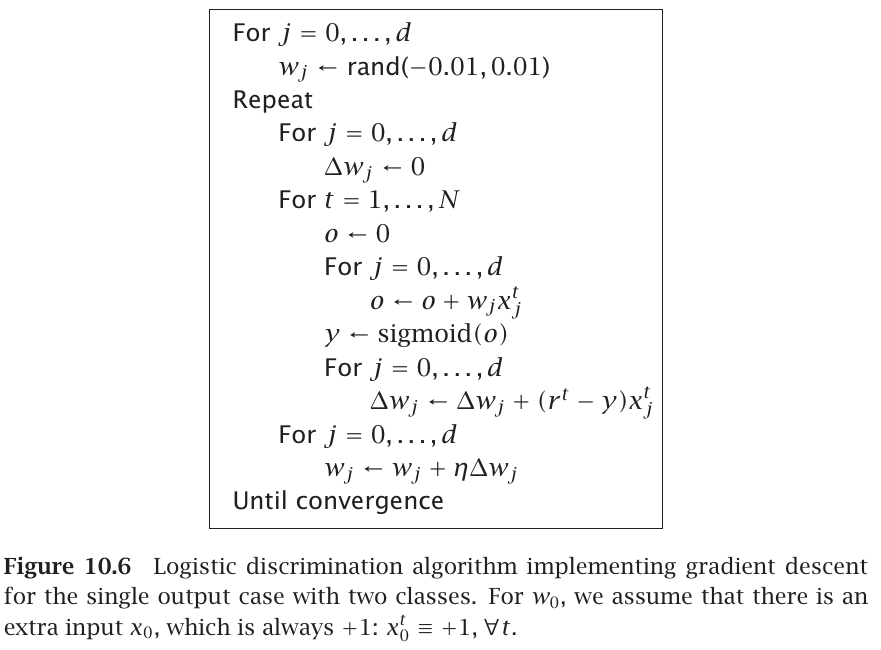

In [60]:
import numpy as np
np.random.seed(42)

# Define hyper-parameters and other size
db_N=40  # number of samples in dataset
K=2      # the number of classes
D=4      # size of dimension OR number of independent variables

# prepare sample data
X=np.round(np.random.rand(db_N,D),2)

# Adding some pattern into X
half_N=int(db_N/2)
X[:half_N,:]=X[:half_N,:]*2
X[half_N:db_N,:]=X[half_N:db_N,:]*5

# number of instances to pick as test set per class
test_numel=5
X_test_class1=X[0:test_numel,:]
X_test_class2=X[half_N:half_N+test_numel,:]

# remove test instances from X
X=np.delete(X, np.s_[0:test_numel], 0)
X=np.delete(X, np.s_[half_N-test_numel:half_N], 0)

N=X.shape[0]

# R is the output
R=np.repeat([1,0], N/K, axis=0)

np.c_[X,R]

array([[ 1.22,  0.28,  0.58,  0.74,  1.  ],
       [ 0.92,  1.58,  0.4 ,  1.02,  1.  ],
       [ 1.18,  0.1 ,  1.22,  0.34,  1.  ],
       [ 0.14,  1.9 ,  1.94,  1.62,  1.  ],
       [ 0.6 ,  0.2 ,  1.36,  0.88,  1.  ],
       [ 0.24,  1.  ,  0.06,  1.82,  1.  ],
       [ 0.52,  1.32,  0.62,  1.04,  1.  ],
       [ 1.1 ,  0.36,  1.94,  1.56,  1.  ],
       [ 1.88,  1.78,  1.2 ,  1.84,  1.  ],
       [ 0.18,  0.4 ,  0.1 ,  0.66,  1.  ],
       [ 0.78,  0.54,  1.66,  0.72,  1.  ],
       [ 0.56,  1.08,  0.28,  1.6 ,  1.  ],
       [ 0.14,  1.98,  1.54,  0.4 ,  1.  ],
       [ 0.02,  1.64,  1.42,  1.46,  1.  ],
       [ 1.54,  0.14,  0.72,  0.24,  1.  ],
       [ 0.15,  3.2 ,  1.55,  2.55,  0.  ],
       [ 4.55,  1.25,  2.05,  3.8 ,  0.  ],
       [ 1.15,  0.4 ,  1.45,  0.8 ,  0.  ],
       [ 4.65,  4.05,  3.15,  4.35,  0.  ],
       [ 4.  ,  0.95,  4.45,  2.7 ,  0.  ],
       [ 4.05,  4.5 ,  1.6 ,  0.55,  0.  ],
       [ 1.15,  2.15,  4.1 ,  4.3 ,  0.  ],
       [ 0.05,  2.55,  2.1 ,  1.

In [73]:
import math 

def log_regression(x,r,d,step_size,iterations):
    x0=np.repeat(1,len(x))
    new_x = np.c_[x0,x]
    w= []
    for j in range(0,d+1):
        w.append(np.random.uniform(-0.01,0.01))
        
    for test in range(0,iterations):
        deriv_w = []
        for j in range(0,d+1):
            deriv_w.append(0)
        for i in range(0,len(new_x)):
            o = 0
            for j in range(0,d+1):
                o = o+w[j]*new_x[i,j]
            y = 1/(1 + math.exp(-o))
            for j in range(0,d):
                deriv_w[j] = deriv_w[j] + (r[i]-y)*new_x[i,j]
                
        for j in range(0,d+1):
            w[j] = w[j] + step_size*deriv_w[j]
    
    return w

In [74]:
log_regression(X,R,D,0.5,10)

[17.651279551175104,
 -12.602510866869213,
 -9.0426265198058289,
 -15.62341741952104,
 -0.0032194041790259862]